In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

In [4]:
from d00_utils.db_utils import dbReadWriteClean, dbReadWriteViews
io_clean = dbReadWriteClean()
io_views = dbReadWriteViews()

/home/ubuntu/anaconda3/envs/usal_echo/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
measurement_abstract_rpt_df = io_clean.get_table("measurement_abstract_rpt")
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568351, 5)


,studyidk,measabstractnumber,name,value,unitname
0,2882,2,(P1/2t)AVM,2.491754,cm2
1,2882,12,Area TSVI,3.606348,cm2
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
4,2882,125,P1/2t VM,88.291224,ms


In [6]:
instances_w_labels_test_df = io_views.get_table('instances_w_labels_test')
instances_w_labels_test_df = instances_w_labels_test_df[(instances_w_labels_test_df['view']=='a2c') | (instances_w_labels_test_df['view']=='a4c')]
print(instances_w_labels_test_df.shape)
instances_w_labels_test_df.head()

(2726, 5)


,sopinstanceuid,filename,instanceidk,view,studyidk
0,1.2.840.113663.1500.1.365900332.3.4.20120704.1...,8ZGVCN6C,696438,a4c,39553
1,1.2.840.113663.1500.1.365900332.3.16.20120704....,8ZGVCPFW,696467,a2c,39553
2,1.2.840.113663.1500.1.365900332.3.9.20120704.1...,8ZGVDB47,696500,a4c,39555
4,1.2.840.113663.1500.1.365900332.3.13.20121022....,D1K0E7SN,738302,a2c,41686
6,1.2.840.113663.1500.1.365900332.3.9.20121106.1...,E457WH6C,744752,a4c,42015


In [7]:
instances_w_labels_test_downsampleby5_df = io_views.get_table('instances_w_labels_test_downsampleby5')
instances_w_labels_test_downsampleby5_df = instances_w_labels_test_downsampleby5_df[(instances_w_labels_test_downsampleby5_df['view']=='a2c') | (instances_w_labels_test_downsampleby5_df['view']=='a4c')]
print(instances_w_labels_test_downsampleby5_df.shape)
instances_w_labels_test_downsampleby5_df.head()

(522, 5)


,sopinstanceuid,filename,instanceidk,view,studyidk
0,1.2.840.113663.1500.1.365900332.3.8.20130125.1...,1LHFYKEZ,779540,a4c,43763
2,1.2.840.113663.1500.1.365900332.3.11.20130611....,7SQZPLEJ,841585,a4c,46919
4,1.2.840.113663.1500.1.365900332.3.8.20131120.1...,EAKXA40T,921901,a4c,50521
15,1.2.840.113663.1500.1.365900332.3.19.20140818....,AFUJWQM9,1078635,a4c,57515
17,1.2.840.113663.1500.1.365900332.3.19.20140828....,AKFY2K0G,1084663,a2c,57770


In [8]:
a_measgraphref_df = io_clean.get_table("a_measgraphref")
print(a_measgraphref_df.shape)
a_measgraphref_df.head()

/home/ubuntu/anaconda3/envs/usal_echo/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(858255, 10)


,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,2882,187,0,57164,0,28.242271,0,,,
1,2882,188,0,57164,0,7.897812,0,,,
2,2882,189,0,57164,0,85.725750,0,,,
3,2882,190,0,57164,0,87.190031,0,,,
4,2882,191,0,57164,1,36.654466,0,,,


In [9]:
def get_recommendation(row):
    return 'normal' if row['ef'] >= 60 else 'abnormal' if row['ef'] < 40 else 'greyzone'

In [10]:
merge_df = measurement_abstract_rpt_df[['studyidk', 'measabstractnumber', 'name']]
merge_df = merge_df.merge(a_measgraphref_df, on=['studyidk', 'measabstractnumber'])
merge_df = merge_df[['studyidk', 'instanceidk', 'indexinmglist', 'meassequence', 'name', 'value', 'howentered']]
print(merge_df.shape)
merge_df.head()

(858255, 7)


,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
0,2882,57164,0,0,AVIts ap4,28.242271,0
1,2882,57164,0,0,DVIts ap4,7.897812,0
2,2882,57164,0,0,VTS(el-ps4),85.725750,0
3,2882,57164,0,0,VTS(MDD-ps4),87.190031,0
4,2882,57164,1,0,AVItd ap4,36.654466,0


In [11]:
start_df = merge_df
filter_df = start_df

In [12]:
filter_df = filter_df[filter_df['name'].str.contains('ps4')]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

858255
70173
0.08176241326878375


In [13]:
filter_df['name'].value_counts()

VTD(MDD-ps4)       18234
VTS(MDD-ps4)       17767
VTD(el-ps4)        17217
VTS(el-ps4)        16778
VolAI(MDD-ps4)       153
VTD(MDD-ps4)esf       12
VTS(MDD-ps4)esf       12
Name: name, dtype: int64

In [14]:
filter_df = filter_df[filter_df['name'].isin(['VTD(MDD-ps4)', 'VTS(MDD-ps4)'])]
filter_df = filter_df[filter_df['value']>0]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

858255
35997
0.04194208015100407


In [15]:
filter_df.head()

,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
3,2882,57164,0,0,VTS(MDD-ps4),87.190031,0
7,2882,57164,1,0,VTD(MDD-ps4),134.335580,0
31,2966,58207,0,0,VTS(MDD-ps4),131.242087,0
35,2966,58207,1,0,VTD(MDD-ps4),250.321472,0
84,5898,102950,0,0,VTD(MDD-ps4),292.888669,0


In [16]:
diastole_df = filter_df[filter_df['name'].str.contains('VTD')]
print(diastole_df.shape)
diastole_df.head()

(18232, 7)


,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
7,2882,57164,1,0,VTD(MDD-ps4),134.335580,0
35,2966,58207,1,0,VTD(MDD-ps4),250.321472,0
84,5898,102950,0,0,VTD(MDD-ps4),292.888669,0
139,6085,105943,1,0,VTD(MDD-ps4),107.762018,0
145,6086,105951,0,0,VTD(MDD-ps4),160.243074,0


In [17]:
systole_df = filter_df[filter_df['name'].str.contains('VTS')]
print(systole_df.shape)
systole_df.head()

(17765, 7)


,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
3,2882,57164,0,0,VTS(MDD-ps4),87.190031,0
31,2966,58207,0,0,VTS(MDD-ps4),131.242087,0
88,5898,102950,1,0,VTS(MDD-ps4),204.461602,0
135,6085,105943,0,0,VTS(MDD-ps4),60.694028,0
149,6086,105951,1,0,VTS(MDD-ps4),69.452834,0


In [18]:
diastole_df['value'].describe()

count    18232.000000
mean       101.035147
std         42.781005
min         11.256703
25%         71.977249
50%         92.516257
75%        119.860211
max        718.944686
Name: value, dtype: float64

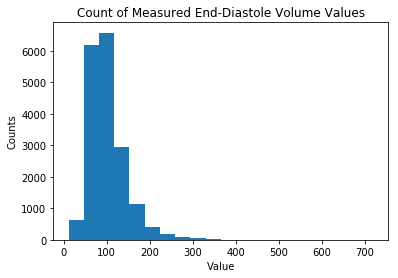

In [19]:
plt.title(f'Count of Measured End-Diastole Volume Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(diastole_df['value'], bins=20);

In [20]:
systole_df['value'].describe()

count    17765.000000
mean        43.836481
std         31.046934
min          0.007379
25%         24.813589
50%         35.459024
75%         51.947772
max        627.923352
Name: value, dtype: float64

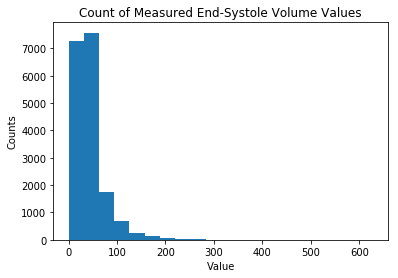

In [21]:
plt.title(f'Count of Measured End-Systole Volume Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(systole_df['value'], bins=20);

In [22]:
agg_diastole_df = diastole_df
agg_diastole_df = agg_diastole_df.groupby(['studyidk', 'instanceidk', 'indexinmglist']).agg({"name": pd.Series.unique, "value": pd.Series.median}).reset_index()
print(agg_diastole_df.shape)
agg_diastole_df.head()

(18149, 5)


,studyidk,instanceidk,indexinmglist,name,value
0,2882,57164,1,VTD(MDD-ps4),134.335580
1,2966,58207,1,VTD(MDD-ps4),250.321472
2,5898,102950,0,VTD(MDD-ps4),292.888669
3,6085,105943,1,VTD(MDD-ps4),107.762018
4,6086,105951,0,VTD(MDD-ps4),160.243074


In [23]:
agg_diastole_df = agg_diastole_df.groupby(['studyidk', 'instanceidk']).agg({"name": pd.Series.unique, "value": pd.Series.median}).reset_index()
print(agg_diastole_df.shape)
agg_diastole_df.head()

(18043, 4)


,studyidk,instanceidk,name,value
0,2882,57164,VTD(MDD-ps4),134.335580
1,2966,58207,VTD(MDD-ps4),250.321472
2,5898,102950,VTD(MDD-ps4),292.888669
3,6085,105943,VTD(MDD-ps4),107.762018
4,6086,105951,VTD(MDD-ps4),160.243074


In [24]:
agg_systole_df = systole_df
agg_systole_df = agg_systole_df.groupby(['studyidk', 'instanceidk', 'indexinmglist']).agg({"name": pd.Series.unique, "value": pd.Series.median}).reset_index()
print(agg_systole_df.shape)
agg_systole_df.head()

(17702, 5)


,studyidk,instanceidk,indexinmglist,name,value
0,2882,57164,0,VTS(MDD-ps4),87.190031
1,2966,58207,0,VTS(MDD-ps4),131.242087
2,5898,102950,1,VTS(MDD-ps4),204.461602
3,6085,105943,0,VTS(MDD-ps4),60.694028
4,6086,105951,1,VTS(MDD-ps4),69.452834


In [25]:
agg_systole_df = agg_systole_df.groupby(['studyidk', 'instanceidk']).agg({"name": pd.Series.unique, "value": pd.Series.median}).reset_index()
print(agg_systole_df.shape)
agg_systole_df.head()

(17648, 4)


,studyidk,instanceidk,name,value
0,2882,57164,VTS(MDD-ps4),87.190031
1,2966,58207,VTS(MDD-ps4),131.242087
2,5898,102950,VTS(MDD-ps4),204.461602
3,6085,105943,VTS(MDD-ps4),60.694028
4,6086,105951,VTS(MDD-ps4),69.452834


In [26]:
both_df = agg_diastole_df.merge(agg_systole_df, on=['studyidk', 'instanceidk'], suffixes=['_diastole', '_systole'])
both_df = both_df[both_df['value_diastole']>=both_df['value_systole']]
print(both_df.shape)
both_df.head()

(17467, 6)


,studyidk,instanceidk,name_diastole,value_diastole,name_systole,value_systole
0,2882,57164,VTD(MDD-ps4),134.335580,VTS(MDD-ps4),87.190031
1,2966,58207,VTD(MDD-ps4),250.321472,VTS(MDD-ps4),131.242087
2,5898,102950,VTD(MDD-ps4),292.888669,VTS(MDD-ps4),204.461602
3,6085,105943,VTD(MDD-ps4),107.762018,VTS(MDD-ps4),60.694028
4,6086,105951,VTD(MDD-ps4),160.243074,VTS(MDD-ps4),69.452834


In [27]:
both_df['ef'] = (both_df['value_diastole']-both_df['value_systole'])/both_df['value_diastole']*100

In [28]:
both_df['ef'].describe()

count    17467.000000
mean        59.270589
std         12.421780
min          2.045626
25%         53.344468
50%         60.574177
75%         67.490581
max         94.035998
Name: ef, dtype: float64

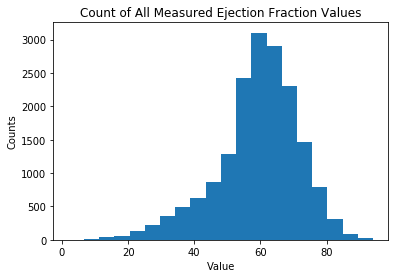

In [29]:
plt.title(f'Count of All Measured Ejection Fraction Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(both_df['ef'], bins=20);

In [30]:
both_df['recommendation'] = both_df.apply(get_recommendation, axis=1)

In [31]:
both_df['recommendation'].value_counts()

normal      9139
greyzone    6881
abnormal    1447
Name: recommendation, dtype: int64

In [32]:
both_df['recommendation'].value_counts()/both_df['recommendation'].value_counts().sum()

normal      0.523215
greyzone    0.393943
abnormal    0.082842
Name: recommendation, dtype: float64

In [33]:
start_df = both_df
filter_df = start_df

In [34]:
# filter_df = filter_df[filter_df['instanceidk'].isin(instances_w_labels_test_df['instanceidk'].unique())]
# print(start_df.shape)
# print(filter_df.shape)
# print(len(filter_df)/len(start_df))

In [35]:
filter_df = filter_df[filter_df['instanceidk'].isin(instances_w_labels_test_downsampleby5_df['instanceidk'].unique())]
print(start_df.shape)
print(filter_df.shape)
print(len(filter_df)/len(start_df))

(17467, 8)
(233, 8)
0.01333944008702124


In [36]:
filter_df = filter_df[filter_df['instanceidk'].isin(a_measgraphref_df['instanceidk'].unique())]
print(start_df.shape)
print(filter_df.shape)
print(len(filter_df)/len(start_df))

(17467, 8)
(233, 8)
0.01333944008702124


In [37]:
len(filter_df['studyidk'].unique())

233

In [38]:
len(filter_df['instanceidk'].unique())

233

In [39]:
filter_df['value_diastole'].describe()

count    233.000000
mean      94.403571
std       40.255568
min       29.259660
25%       66.674961
50%       86.504704
75%      116.553208
max      333.119556
Name: value_diastole, dtype: float64

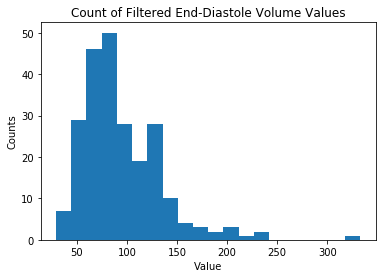

In [40]:
plt.title(f'Count of Filtered End-Diastole Volume Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['value_diastole'], bins=20);

In [41]:
filter_df['value_systole'].describe()

count    233.000000
mean      38.161051
std       27.894090
min        6.510014
25%       21.525210
50%       30.521122
75%       46.060886
max      231.977565
Name: value_systole, dtype: float64

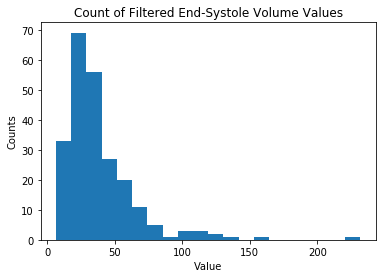

In [42]:
plt.title(f'Count of Filtered End-Systole Volume Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['value_systole'], bins=20);

In [43]:
filter_df['ef'].describe()

count    233.000000
mean      62.131719
std       12.533967
min       22.403351
25%       55.641597
50%       63.932529
75%       70.432987
max       92.501219
Name: ef, dtype: float64

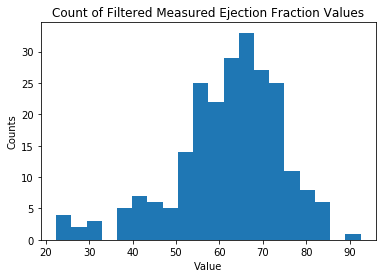

In [44]:
plt.title(f'Count of Filtered Measured Ejection Fraction Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['ef'], bins=20);

In [45]:
filter_df['recommendation'].value_counts()

normal      146
greyzone     72
abnormal     15
Name: recommendation, dtype: int64

In [46]:
filter_df['recommendation'].value_counts()/filter_df['recommendation'].value_counts().sum()

normal      0.626609
greyzone    0.309013
abnormal    0.064378
Name: recommendation, dtype: float64

In [47]:
filter_df.head()

,studyidk,instanceidk,name_diastole,value_diastole,name_systole,value_systole,ef,recommendation
614,43763,779540,VTD(MDD-ps4),45.964351,VTS(MDD-ps4),17.993407,60.853560,normal
724,46919,841585,VTD(MDD-ps4),124.449981,VTS(MDD-ps4),60.740148,51.193124,greyzone
889,50521,921901,VTD(MDD-ps4),91.569690,VTS(MDD-ps4),40.583427,55.680283,greyzone
1386,57515,1078635,VTD(MDD-ps4),73.781595,VTS(MDD-ps4),31.494208,57.314276,greyzone
1756,60906,1168238,VTD(MDD-ps4),132.222893,VTS(MDD-ps4),57.683639,56.373940,greyzone
